In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
df_train = pd.read_csv('titanic/train.csv')
df_test = pd.read_csv('titanic/test.csv')

df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [140]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [141]:
df_train.info()
print('\n')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass

In [142]:
print('Train:')
df_train.isnull().sum()

Train:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [143]:
print('Test:')
df_test.isnull().sum()

Test:


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [144]:
df_train.duplicated().sum()

0

In [145]:
df_test.duplicated().sum()

0

In [146]:
for i in df_train:
    print(i + ':')
    print(df_train[i].value_counts())

PassengerId:
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64
Survived:
0    549
1    342
Name: Survived, dtype: int64
Pclass:
3    491
1    216
2    184
Name: Pclass, dtype: int64
Name:
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
Sex:
male      577
female    314
Name: Sex, dtype: int64
Age:
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.5

In [147]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the previous 2 cells we see that:
   - more than half of passengers haven't survived
   - passengers were more from the 2nd and 3rd class
   - an average age is aproximately 30 (young people), thus elder people are less
   - most of passengers did not travel with parents or children (parch up to 75% is still 0)
   - the highest fire is 512, but those who paid such amount of money are in a small number, as up to 75%, the fare is 31
   - names are unique, the id were too 
   - NaN values in 'age', 'cabin' and 2 in 'embarked' columns

In [148]:
# let's see some statistics for non-numeric features
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


as we can see, for:
 - 'name' is unique
 - 'sex' there are 2 categories
 - 'embarked' has 3 classes and 2 null values
 - only ~20% of 'cabin' columns has data 

In [149]:
# we assume that the passengers from higher class have survived, but let's see how true this information is
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [150]:
# now let's see by gender
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [151]:
df_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [152]:
df_train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [153]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


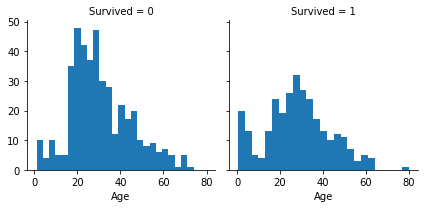

In [154]:
# we can't do the same study on the age, but we can plot 2 histograms
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=25)

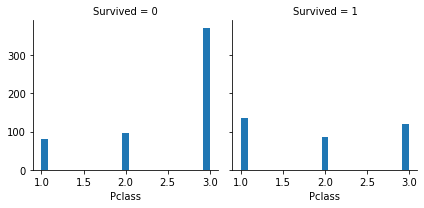

In [155]:
# the same we do again for the 'pclass' taking in consideration the age
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Pclass', bins=25)

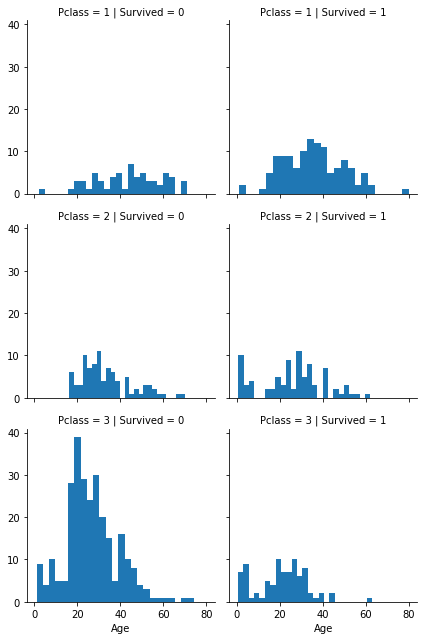

In [156]:
# the same we do again for the 'pclass' taking in consideration the age
g = sns.FacetGrid(df_train, col='Survived', row='Pclass')
g.map(plt.hist, 'Age', bins=25)

In [157]:
df_train[['Pclass', 'Age']].groupby(['Pclass'], as_index=False).median().sort_values(by='Age', ascending=False)

,Pclass,Age
0,1,37.0
1,2,29.0
2,3,24.0


Conclusions:
   - the number of those who survived from the 1st class is the same as those from the 3rd class
     but however, from the 3rd class haven't survive much more people, in contrast to other classes
   - looking how the age is distributed in every class, those from the 1st class are older that the rest of the class

I think that we are done with analysing, let's prepare the data for training and test


In [158]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [159]:
df = pd.concat([df_train, df_test])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [160]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [161]:
df.loc[df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


the passenger where the 'Fare' is null is Mr. Thomas who travelled alone in the 3rd class and embarked in Southhampton. We won't delete this data, but we will replace with similar cases from df.

In [162]:
mr_thomas = df.loc[(df['Pclass'] == 3) & (df['Embarked'] == 'S') & (df['SibSp'] == 0)]['Fare'].median()
mr_thomas

7.925

In [163]:
# let's replace 
df.loc[df['Fare'].isnull(), 'Fare'] = mr_thomas

In [164]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

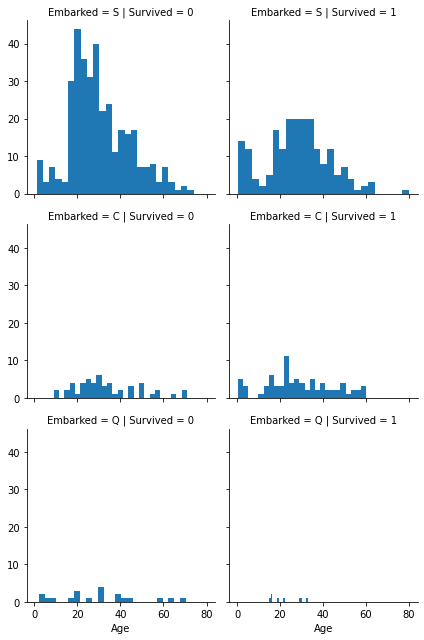

In [165]:
# the same we do again for the 'embarked' taking in consideration the age
g = sns.FacetGrid(df_train, col='Survived', row='Embarked')
g.map(plt.hist, 'Age', bins=25)

In [166]:
# for 'Embarked', we will substitute those 2 missing values with mode
# mode() is the value that appears most often in the dataset
df['Embarked'].mode()[0]

'S'

In [167]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [168]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [169]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",NaN,0,0,A.5. 3236,8.0500,NaN,1,0,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,0,0,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1,0,1
416,1308,NaN,3,"Ware, Mr. Frederick",NaN,0,0,359309,8.0500,NaN,1,0,1


In [170]:
df1 = df.drop(['PassengerId', 'Name','Ticket', 'Cabin'], axis=1)

In [171]:
# df1['Age'] = df1.groupby(['Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
df1['Age'] = df1['Age'].fillna(df1.groupby('Pclass')['Age'].transform('median'))


Principle Component Analysis(PCA) is used here to transform features with a high correlation and equivalent information in the into a single feature.

In [172]:
df1.isnull().sum()

Survived      418
Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
Sex_male        0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [178]:
df1_test = df1.loc[df1['Survived'].isna()]
df1_train = df1.loc[df1['Survived'].notna()]

print('Test shape is ', df1_test.shape)
print('Train shape is ', df1_train.shape)

Test shape is  (418, 9)
Train shape is  (891, 9)


In [181]:
df1_test.isnull().sum()

Survived      418
Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
Sex_male        0
Embarked_Q      0
Embarked_S      0
dtype: int64

<AxesSubplot:>

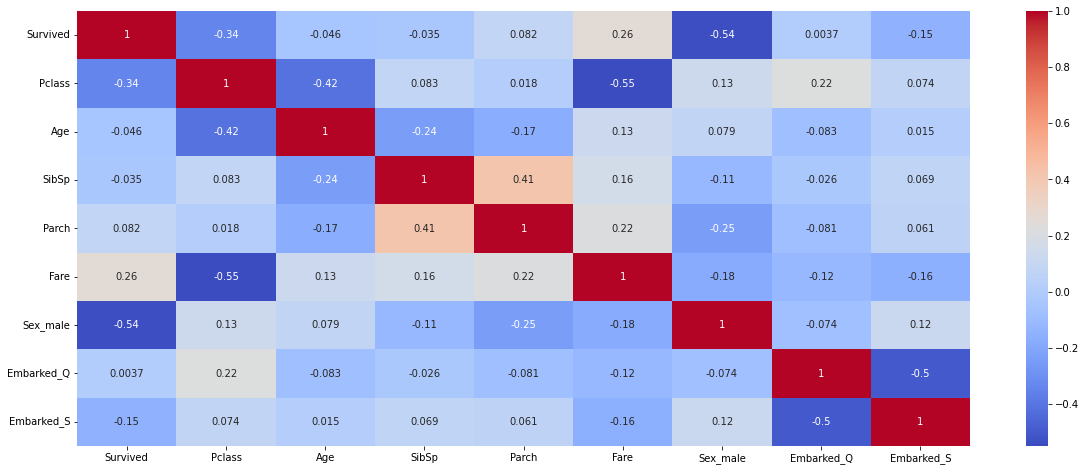

In [182]:
# correlation using heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df1_train.corr(), annot = True, cmap='coolwarm')

- So, we have a negative correlation of 'fare' with 'pclass' of -0.55; therefore we will use PCA to convert it into a single feature. 

- Similarly, 'Embarked_Q' and 'Embarked_S' have a correlation of -0.5.

- 'Sex_male' and 'Survived' have a negative correlation equal to -0.54.

# PCA

In [189]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df1_train)
pca_X = pca.transform(df1_train)

# Hey mentor, what is this?
# X_train = pca.fit_transform(df1_train)
# X_test = pca.fit_trasform(df1_test)

In [190]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.93334434, 0.06559755])

In [203]:
y_train = df1_train['Survived']
X_train = df1_train.drop(['Survived'], axis=1)
X_test = df1_test.drop(['Survived'], axis=1)
# y_test = df1_test['Survived']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((891, 8), (891,), (418, 8), (418,))

# Logistic Regression

In [204]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

#
y_pred=logreg.predict(X_test)

acc = round(logreg.score(X_train, y_train) * 100, 2)
acc

c:\users\darinela\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


81.03

In [205]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
# X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['l2', 'l1']
c_values = [100, 10, 1.0, 0.1, 0.01, 0.001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.808423 using {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.801340 (0.039036) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.803945 (0.038532) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.801340 (0.039036) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.686122 (0.028451) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.683125 (0.030794) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.801340 (0.039036) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'sag'}
0.683125 (0.030794) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.802089 (0.038852) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.805073 (0.041221) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.802451 (0.038285) with: {'C': 10, 'penalty

c:\users\darinela\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
540 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\darinela\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\darinela\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\darinela\appdata

In [206]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(C=0.1, penalty='l2', solver = 'lbfgs')

# fit the model with data
logreg.fit(X_train, y_train)
#
y_pred=logreg.predict(X_test)

acc = round(logreg.score(X_train, y_train) * 100, 2)
acc

c:\users\darinela\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


81.48

# DecisionTreeClassifier

In [225]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = round(clf.score(X_train, y_train) * 100, 6)
acc

85.072952

In [226]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(X_train, y_train)
grid_search.best_estimator_

Fitting 4 folds for each of 50 candidates, totalling 200 fits


DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)

In [227]:
clf = DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc_dtc = round(clf.score(X_train, y_train) * 100, 6)
acc_dtc

88.439955

# Random Forest

In [234]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=60)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_rfc = round(random_forest.score(X_train, y_train) * 100, 6)
acc_rfc

98.204265